In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nengo
%matplotlib inline

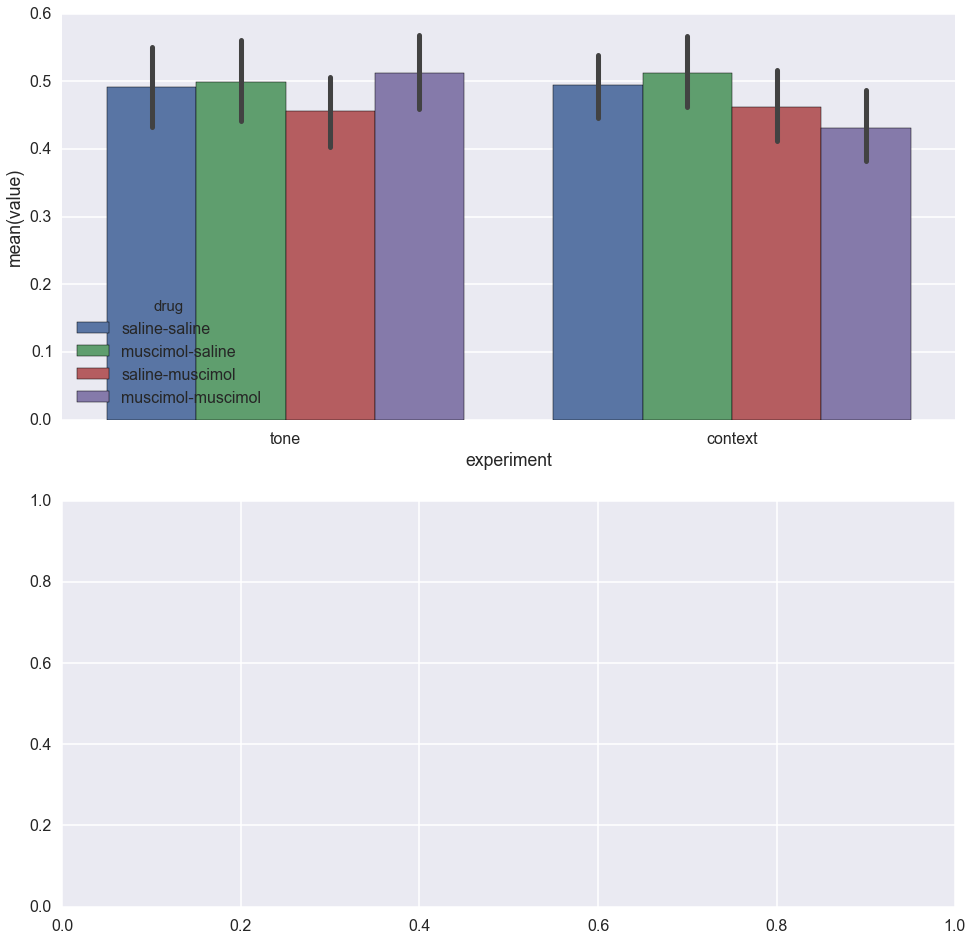

In [26]:
n_trials=100
tips = sns.load_dataset("tips")

columns=('value','experiment','drug')
df = pd.DataFrame(index=np.arange(0, n_trials), columns=columns)

i=0
for exp in ['tone','context']:
    for subj in ['saline-saline','muscimol-saline','saline-muscimol','muscimol-muscimol']:
        for n in range(n_trials):
            df.loc[i]=[np.random.rand(),exp,subj]
            i+=1
# print df

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 16))
sns.set(context='poster')
sns.barplot(x="experiment",y="value",hue='drug',data=df,ax=ax1)


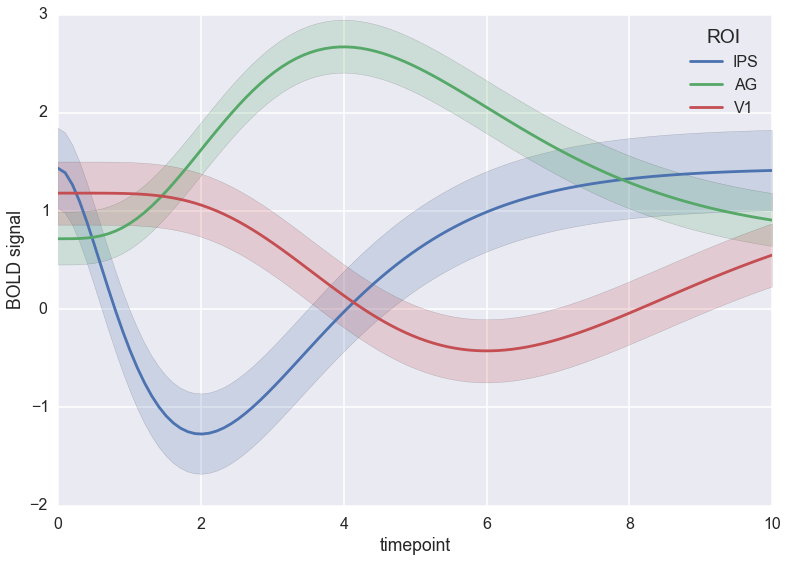

In [27]:
gammas = sns.load_dataset("gammas")
ax = sns.tsplot(time="timepoint", value="BOLD signal",
                 unit="subject", condition="ROI",
                 data=gammas)
# print gammas

In [37]:
n_trials=10
columns=('value','trial','timepoint','experiment','drug')
dataframe = pd.DataFrame(index=np.arange(0, n_trials), columns=columns)

i=0
for exp in ['tone']:
    for subj in ['saline-saline','muscimol-saline','saline-muscimol','muscimol-muscimol']:
        for n in range(n_trials):
            for t in np.arange(0,20):
                value=t**2+np.random.rand()*t**2
                dataframe.loc[i]=[value,n,t,exp,subj]
                i+=1
# print dataframe
# print tips

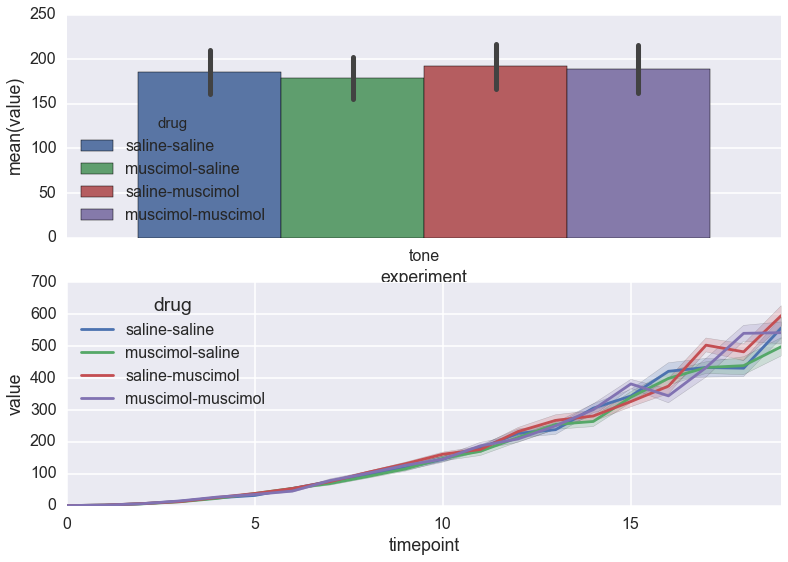

In [45]:
f, (ax1, ax2) = plt.subplots(2, 1)
sns.set(context='poster')
# sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="Set3",ax=ax1)
sns.barplot(x="experiment",y="value",hue='drug',data=dataframe,ax=ax1)
sns.tsplot(time="timepoint", value="value",
                 unit="trial", condition="drug",
                 data=dataframe,ax=ax2)
filename='test_data.pkl'
dataframe.to_pickle(filename)
picturename='test_picture.png'
f.savefig(picturename)

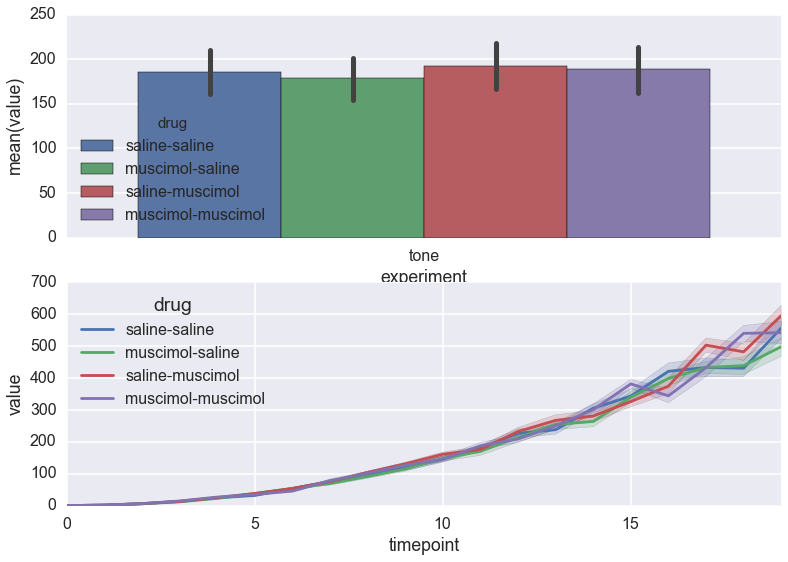

In [40]:
data_new = pd.read_pickle('test_data.pkl')
f, (ax1, ax2) = plt.subplots(2, 1)
sns.set(context='poster')
# sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="Set3",ax=ax1)
sns.barplot(x="experiment",y="value",hue='drug',data=data_new,ax=ax1)
sns.tsplot(time="timepoint", value="value",
                 unit="trial", condition="drug",
                 data=data_new,ax=ax2)

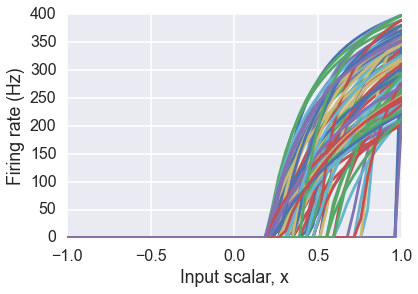

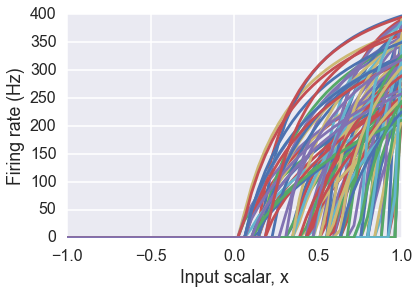

In [17]:
from nengo.dists import Choice,Exponential,Uniform
from nengo.utils.ensemble import tuning_curves


dim=1
N=100
thresh_error=0.2
model = nengo.Network()
with model:
    error_on_exp = nengo.Ensemble(N, dim, encoders=Choice([[1]]),
            intercepts=Exponential(scale=(1 - thresh_error) / 5.0, shift=thresh_error, high=1),
            eval_points=Uniform(thresh_error, 1.1), n_eval_points=5000)
    error_on_uniform=nengo.Ensemble(N,dim,encoders=Choice([[1]]), intercepts=Uniform(0, 1))
sim = nengo.Simulator(model)

eval_points, activities = tuning_curves(error_on_exp, sim)
plt.plot(eval_points, activities)
# We could have alternatively shortened this to
# plt.plot(*tuning_curves(ens_1d, sim))
plt.ylabel("Firing rate (Hz)")
plt.xlabel("Input scalar, x");
plt.show()

eval_points, activities = tuning_curves(error_on_uniform, sim)
plt.plot(eval_points, activities)
# We could have alternatively shortened this to
# plt.plot(*tuning_curves(ens_1d, sim))
plt.ylabel("Firing rate (Hz)")
plt.xlabel("Input scalar, x");
plt.show()